In [5]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

## Measures of center


In [6]:
# Create a dataframe with a dictionary of 10 random integers between 20 and 50.
np.random.seed(12)
df= pd.DataFrame({'Age':np.random.randint(20,50,10)})
df

,Age
0,31
1,47
2,26
3,49
4,37
5,22
6,23
7,23
8,32
9,36


In [7]:
# mean
print('The mean Age is: ', df.Age.mean())

The mean Age is:  32.6


In [8]:
# median
print('The median Age is: ', df.Age.median())

The median Age is:  31.5


In [9]:
# mode
print("The mode of Age is: ",statistics.mode(df.Age))

The mode of Age is:  23


In [10]:
# Outliers
df.loc[len(df.index)] = 95
df

,Age
0,31
1,47
2,26
3,49
4,37
5,22
6,23
7,23
8,32
9,36


In [11]:
# updated mean with outlier value
df.Age.agg([np.mean,np.median])

mean      38.272727
median    32.000000
Name: Age, dtype: float64

## Histogram

In [12]:
# Create a dataframe with a dictionary of random distrubution of mean 150, standard dev,10 and size = 100
np.random.seed(12)
data=pd.DataFrame({"Weight in pounds": np.random.normal(150,10,100)})
data.head(3)

,Weight in pounds
0,154.729858
1,143.185741
2,152.424395


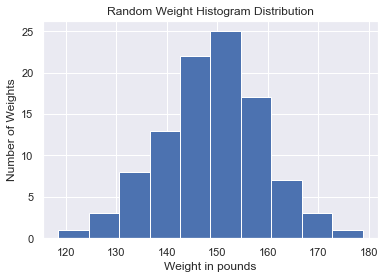

In [130]:
# plot histogram of the weight column
sns.set()
plt.hist(data['Weight in pounds'])
plt.xlabel('Weight in pounds')
plt.ylabel('Number of Weights')  
plt.title("Random Weight Histogram Distribution")       
plt.show()   

## Cumulative Distribution Function

In [131]:
def cdf(data):
    x= np.sort(data)
    y= np.arange(1,len(x)+1)/len(x)
    plt.plot(x,y,marker='.', linestyle='none')
    plt.xlabel('Weight in pounds')
    plt.ylabel('CDF')
    plt.title('Cumulative Distribution Function')
    plt.show()

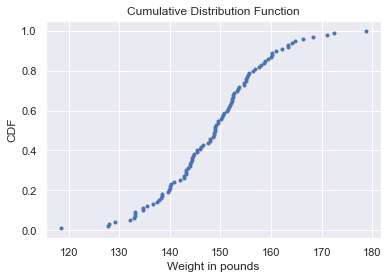

In [132]:
cdf(data['Weight in pounds'])

## Measure of Dispersion

In [14]:
# variance
variance=np.var(data['Weight in pounds'])
print('The variance of weight is: ', variance)

The variance of weight is:  109.40124282755109


In [15]:
# Standardd deviation
std= np.std(data['Weight in pounds'])
print('The standard deviation of weight is: ', std)

The standard deviation of weight is:  10.459504903557868


In [16]:
#Percentiles
percentile_50th= np.percentile(data['Weight in pounds'],50)
print('50th percentile is : ',percentile_50th)
percentile= np.percentile(data['Weight in pounds'],[0,20,40,60,80,100])
percentile

50th percentile is :  148.89608871938955


array([118.52583478, 139.97286434, 145.76714186, 151.41931589,
       156.48170111, 178.71819395])

In [17]:
#Interquartile Range
iqr=np.percentile(data['Weight in pounds'],75) - np.percentile(data['Weight in pounds'],25)
print('the interquartile is : ', iqr)

the interquartile is :  12.433529267546618


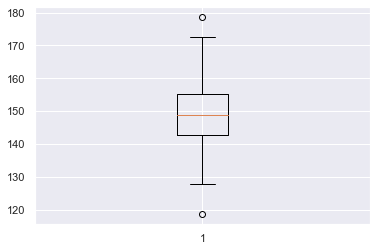

In [18]:
sns.set()
plt.boxplot(data['Weight in pounds'])
plt.show()

In [19]:
# Outliers
lower_outlier= np.percentile(data['Weight in pounds'],25) - 1.5 * iqr
upper_outlier= np.percentile(data['Weight in pounds'],75) + 1.5 * iqr
print('outliers are : ',[lower_outlier,upper_outlier])

outliers are :  [123.9602745048105, 173.69439157499698]


## Normal Distribution

For example, An audit firm has collected the income of people working in an aluminium manufacturing industry. The income appears to be normally distributed with a mean of 2500 and a standard deviation of 25. Using the scipy.stats library import norm.rvs to sample 500

0.0


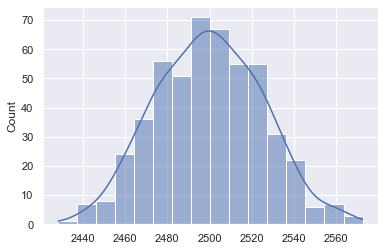

In [27]:

from scipy.stats import norm
sample_500 = norm.rvs(2500,25,size=500)
sns.histplot(sample_500,kde=True)


## Central Limit Theorem

In [30]:
die= pd.Series(range(1,7))
die

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [48]:
def cal_sample_mean(series, sample_size,n_rolls):
    """appends a list of sample means from pandas series
     Args:
     pandas series, sample_size, n_rolls as the number of times sampling was made
     Returns:
     list of sample_means
    """ 
    sample_means = []
    for i in range(n_rolls):
        sample_means.append(np.mean(die.sample(5, replace=True)))
    return sample_means
    

   

<AxesSubplot:ylabel='Count'>

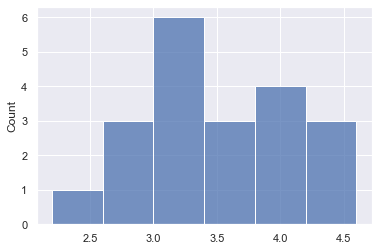

In [79]:
sample_20_times =cal_sample_mean(die,10,20)
sns.histplot(sample_20_times)


<AxesSubplot:ylabel='Count'>

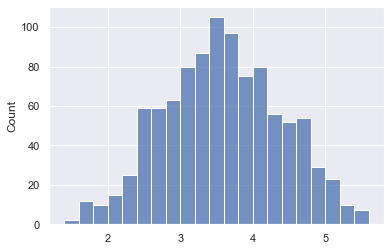

In [77]:
sample_1000_times =cal_sample_mean(die,10,1000)
sns.histplot(sample_1000_times)

## Binomial Distribution
for example, in a manufacturing rubber plant,the probability of hiring a male worker is 0.82 out of 50 survey.

binom.pmf calculatescalculatescalculates probability of getting exactly x number of males

binom.cdf calculatescalculates probability of getting x number of males or less

binom.cdf calculates the probability of getting x number of males or more


In [120]:
from scipy.stats import binom
prob_35_men= binom.pmf(35,50,0.82)
print(prob_98_men)

prob_25_or_less_men = binom.cdf(42,50,0.82)
print(prob_25_or_less_men)

prob_39_or_more_men = binom.sf(39,50,0.82)
print(prob_39_or_more_men)


0.014618911028809582
0.6995890740896223
0.7187428925621797


## Total Probability law
In a data entry job, the probability of completing work on time with fast internet speed and slow internet speed are 0.91 and 0.39 respectively. The probability that there is fast internet speed and slow internet speed are 0.77 and 0.23. What will be the probability of completing the job on time? 

In [122]:
prob_job_fast_internet = 0.91
prob_job_slow_internet = 0.39
prob_fast_internet = 0.77
prob_slow_internet = 0.23

prob_finish_job = prob_job_fast_internet * prob_fast_internet + prob_job_slow_internet*prob_slow_internet
print("The probability of fishing job on time is : ",prob_finish_job)

The probability of fishing job on time is :  0.7904


## Bootstrap sampling

In [142]:
# creating a bootstrap sample from the data['Weights in pounds'] dataframe.
# use the numpy random choice function to select with replacement from the dataframe.
# A for loop to acquire 100 bootstrap samples of the data.
for _ in range(100):
    bs_sample= np.random.choice(data['Weight in pounds'], size=len(data['Weight in pounds'])) 
print('The bootstrap sample mean is: ',np.mean(bs_sample))
print('The bootstrap sample median is: ',np.median(bs_sample))
print('The bootstrap sample standard deviation is: ',np.std(bs_sample))

The bootstrap sample mean is:  148.85679358638035
The bootstrap sample median is:  148.68217457647427
The bootstrap sample standard deviation is:  10.053324800872536


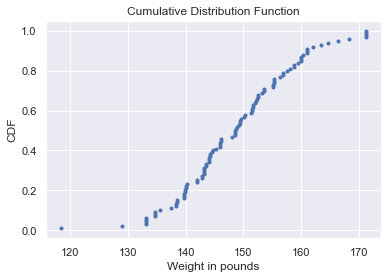

In [147]:
# plotting the cdf of the bootstrap sample
cdf(bs_sample)
